# pandas的拼接操作

pandas的拼接分为两种：
- 级联：pd.concat, pd.append
- 合并：pd.merge, pd.join

## 0. 回顾numpy的级联

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
n1 = np.random.random(size=(3,3))
print(n1)

n2 = np.random.random(size=(4,4))
print(n2)
np.concatenate((n1,n2),axis=1)
# np.concatenate((n1,n2),axis=1)

[[0.33513933 0.8161296  0.94271746]
 [0.997328   0.14921713 0.43964555]
 [0.91123601 0.43022325 0.67303298]]
[[0.55305819 0.17490522 0.07455062 0.54678101]
 [0.40758691 0.48606558 0.17907648 0.66114938]
 [0.95175315 0.0990287  0.27091342 0.41877985]
 [0.01760803 0.9046161  0.80450159 0.78503635]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [3]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5,6]])
print(b.T)
np.concatenate((a, b.T), axis=1)

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

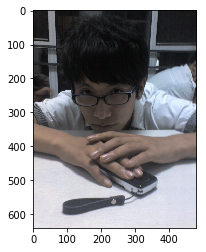

In [5]:
dancer = plt.imread('dancer.jpg')
plt.imshow(dancer)

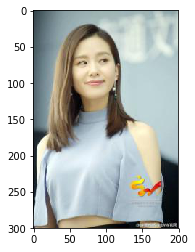

In [6]:
shishi = plt.imread('shishi.jpg')
plt.imshow(shishi)

In [7]:
dancer.shape

(640, 480, 3)

In [8]:
shishi.shape

(300, 200, 3)

In [9]:
dancer_shuai = dancer[100:400,100:300]
dancer_shuai.shape

(300, 200, 3)

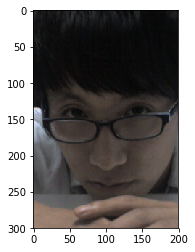

In [10]:
plt.imshow(dancer_shuai)

In [11]:
image = np.concatenate((shishi,dancer_shuai),axis=1)

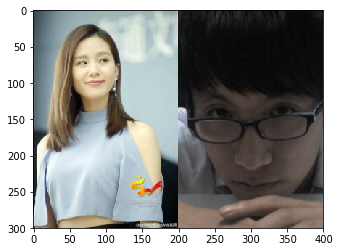

In [12]:
plt.imshow(image)

============================================

练习12：

1. 生成2个5*5的矩阵，对其分别进行两个维度上的级联

============================================

为方便讲解，我们首先定义一个生成DataFrame的函数：

In [13]:
data={k:[k+str(i) for i in list('12345')] for k in list('ABCDE')}
display(data)
DataFrame(data=data,index=list('12345'))

{'A': ['A1', 'A2', 'A3', 'A4', 'A5'],
 'B': ['B1', 'B2', 'B3', 'B4', 'B5'],
 'C': ['C1', 'C2', 'C3', 'C4', 'C5'],
 'D': ['D1', 'D2', 'D3', 'D4', 'D5'],
 'E': ['E1', 'E2', 'E3', 'E4', 'E5']}

,A,B,C,D,E
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,E3
4,A4,B4,C4,D4,E4
5,A5,B5,C5,D5,E5


In [14]:
def creat_DF(index,columns):
    data = {k:[k+str(i) for i in index] for k in columns}
    return DataFrame(data=data,index=index)

In [15]:
df1 = creat_DF(list('12345'),list('ABCDE'))

In [16]:
df2 = creat_DF(list('12345'),list('EFGHI'))

In [17]:
pd.concat((df1,df2),axis=1)

,A,B,C,D,E,E,F,G,H,I
1,A1,B1,C1,D1,E1,E1,F1,G1,H1,I1
2,A2,B2,C2,D2,E2,E2,F2,G2,H2,I2
3,A3,B3,C3,D3,E3,E3,F3,G3,H3,I3
4,A4,B4,C4,D4,E4,E4,F4,G4,H4,I4
5,A5,B5,C5,D5,E5,E5,F5,G5,H5,I5


## 1. 使用pd.concat()级联

pandas使用pd.concat函数，与np.concatenate函数类似，只是多了一些参数：
```
objs
axis=0
join='outer'
join_axes=None
ignore_index=False
```

### 1)  简单级联

和np.concatenate一样，优先增加行数（默认axis=0）

可以通过设置axis来改变级联方向

级连会把该方向上索引相同的元素放在一行（一列），index/columns在级联时可以重复

也可以选择忽略ignore_index，重新索引

In [18]:
# 一般用于横向级联，也就是以行标签为参考进行的级联。ignore_index会重新分配标签，所以应保证你的标签是没有实际含义的
pd.concat((df1,df2),axis=0,ignore_index=True)

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I
0,A1,B1,C1,D1,E1,NaN,NaN,NaN,NaN
1,A2,B2,C2,D2,E2,NaN,NaN,NaN,NaN
2,A3,B3,C3,D3,E3,NaN,NaN,NaN,NaN
3,A4,B4,C4,D4,E4,NaN,NaN,NaN,NaN
4,A5,B5,C5,D5,E5,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,E1,F1,G1,H1,I1
6,NaN,NaN,NaN,NaN,E2,F2,G2,H2,I2
7,NaN,NaN,NaN,NaN,E3,F3,G3,H3,I3
8,NaN,NaN,NaN,NaN,E4,F4,G4,H4,I4
9,NaN,NaN,NaN,NaN,E5,F5,G5,H5,I5


或者使用多层索引 keys  

concat([x,y],keys=['x','y'])

In [19]:
pd.concat((df1,df2),axis=1,keys=['期中','期末'])

期中                  期末                
    A   B   C   D   E   E   F   G   H   I
1  A1  B1  C1  D1  E1  E1  F1  G1  H1  I1
2  A2  B2  C2  D2  E2  E2  F2  G2  H2  I2
3  A3  B3  C3  D3  E3  E3  F3  G3  H3  I3
4  A4  B4  C4  D4  E4  E4  F4  G4  H4  I4
5  A5  B5  C5  D5  E5  E5  F5  G5  H5  I5

In [20]:
df3 = creat_DF(list('123'),list('XYZ'))
df3

,X,Y,Z
1,X1,Y1,Z1
2,X2,Y2,Z2
3,X3,Y3,Z3


In [21]:
df1

,A,B,C,D,E
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,E3
4,A4,B4,C4,D4,E4
5,A5,B5,C5,D5,E5


In [22]:
total = pd.concat((df1,df3),axis=1)

D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
# total.fillna(value=0)
total

,A,B,C,D,E,X,Y,Z
1,A1,B1,C1,D1,E1,X1,Y1,Z1
2,A2,B2,C2,D2,E2,X2,Y2,Z2
3,A3,B3,C3,D3,E3,X3,Y3,Z3
4,A4,B4,C4,D4,E4,NaN,NaN,NaN
5,A5,B5,C5,D5,E5,NaN,NaN,NaN


In [24]:
# 【重点】
# 查看一张表哪一列\行存在空值
print(total.isnull())
nan_list = total.isnull().any(axis=0)

       A      B      C      D      E      X      Y      Z
1  False  False  False  False  False  False  False  False
2  False  False  False  False  False  False  False  False
3  False  False  False  False  False  False  False  False
4  False  False  False  False  False   True   True   True
5  False  False  False  False  False   True   True   True


In [25]:
nan_list

A    False
B    False
C    False
D    False
E    False
X     True
Y     True
Z     True
dtype: bool

In [26]:
total.loc[:,nan_list]
#: 表示选择所有行，而 nan_list 表示选择列表中列标签对应的列。这将返回一个新的 DataFrame，其中包含所有行和指定列的数据。

,X,Y,Z
1,X1,Y1,Z1
2,X2,Y2,Z2
3,X3,Y3,Z3
4,NaN,NaN,NaN
5,NaN,NaN,NaN


In [27]:
# 需求:提取包含空值的列

In [28]:
n = np.array([True,False,True])
n.any()

True

In [29]:
n1 = np.array([1,2,3,4,5,6])
bool_list = [True,False,False,True,False,True]
n1[bool_list]

array([1, 4, 6])

============================================

练习13：

1. 想一想级联的应用场景？

2. 使用昨天的知识，建立一个期中考试张三、李四的成绩表ddd

3. 假设新增考试学科"计算机"，如何实现？

4. 新增王老五同学的成绩，如何实现？

============================================

In [30]:
data = np.random.randint(0,150,size=(2,3))
index = ['张三','李四']
columns = ['python','Java','C']
df = DataFrame(data=data,index=index,columns=columns)
df

,python,Java,C
张三,27,72,54
李四,57,125,73


In [31]:
data1 = np.random.randint(0,150,size=(2,1))
index1 =  ['张三','李四']
columns1 = ['计算机']
df2 = DataFrame(data=data1,index=index1,columns=columns1)
df2

,计算机
张三,134
李四,89


In [32]:
score = pd.concat((df,df2),axis=1)

In [33]:
score

,python,Java,C,计算机
张三,27,72,54,134
李四,57,125,73,89


In [34]:
columns2 = score.columns
data2 = np.random.randint(0,150,size=(1,4))
index2 = ['王老五']
df3 = DataFrame(data=data2,index=index2,columns=columns2)
df3

,python,Java,C,计算机
王老五,146,25,111,128


In [35]:
score.append(df3)

,python,Java,C,计算机
张三,27,72,54,134
李四,57,125,73,89
王老五,146,25,111,128


In [36]:
pd.concat((score,df3))

,python,Java,C,计算机
张三,27,72,54,134
李四,57,125,73,89
王老五,146,25,111,128


### 2) 不匹配级联

不匹配指的是级联的维度的索引不一致。例如纵向级联时列索引不一致，横向级联时行索引不一致

有3种连接方式：

- 外连接：补NaN（默认模式）

- 内连接：只连接匹配的项

- 连接指定轴 join_axes

In [37]:
df1 = creat_DF(list('12345'),list('ABCDE'))
print(df1)

df2 = creat_DF(list('234'),list('CDE'))
print(df2)
pd.concat((df1,df2),axis=1,join='inner')

    A   B   C   D   E
1  A1  B1  C1  D1  E1
2  A2  B2  C2  D2  E2
3  A3  B3  C3  D3  E3
4  A4  B4  C4  D4  E4
5  A5  B5  C5  D5  E5
    C   D   E
2  C2  D2  E2
3  C3  D3  E3
4  C4  D4  E4


,A,B,C,D,E,C,D,E
2,A2,B2,C2,D2,E2,C2,D2,E2
3,A3,B3,C3,D3,E3,C3,D3,E3
4,A4,B4,C4,D4,E4,C4,D4,E4


In [41]:
print(df1)

print(df2)
display(pd.concat((df1,df2),axis=0))
pd.concat((df1,df2),axis=0,join_axes=[df2.columns])

    A   B   C   D   E
1  A1  B1  C1  D1  E1
2  A2  B2  C2  D2  E2
3  A3  B3  C3  D3  E3
4  A4  B4  C4  D4  E4
5  A5  B5  C5  D5  E5
    C   D   E
2  C2  D2  E2
3  C3  D3  E3
4  C4  D4  E4


D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,A,B,C,D,E
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,E3
4,A4,B4,C4,D4,E4
5,A5,B5,C5,D5,E5
2,NaN,NaN,C2,D2,E2
3,NaN,NaN,C3,D3,E3
4,NaN,NaN,C4,D4,E4


D:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,A,B,C,D,E
1,A1,B1,C1,D1,E1
2,A2,B2,C2,D2,E2
3,A3,B3,C3,D3,E3
4,A4,B4,C4,D4,E4
5,A5,B5,C5,D5,E5
2,NaN,NaN,C2,D2,E2
3,NaN,NaN,C3,D3,E3
4,NaN,NaN,C4,D4,E4


In [44]:
index = pd.Index(['C','D'])
print(index)

Index(['C', 'D'], dtype='object')


In [45]:
index

Index(['C', 'D'], dtype='object')

In [53]:
pd.concat((df1,df2),axis=0,join_axes=[index])

,C,D
1,C1,D1
2,C2,D2
3,C3,D3
4,C4,D4
5,C5,D5
2,C2,D2
3,C3,D3
4,C4,D4


In [54]:
type(df2.columns)

pandas.core.indexes.base.Index

In [55]:
pd.core.indexes.base.Index?

Init signature: pd.core.indexes.base.Index(data=None, dtype=None, copy=False, name=None, fastpath=False, tupleize_cols=True, **kwargs)
Docstring:     
Immutable ndarray implementing an ordered, sliceable set. The basic object
storing axis labels for all pandas objects

Parameters
----------
data : array-like (1-dimensional)
dtype : NumPy dtype (default: object)
    If dtype is None, we find the dtype that best fits the data.
    If an actual dtype is provided, we coerce to that dtype if it's safe.
    Otherwise, an error will be raised.
copy : bool
    Make a copy of input ndarray
name : object
    Name to be stored in the index
tupleize_cols : bool (default: True)
    When True, attempt to create a MultiIndex if possible

Notes
-----
An Index instance can **only** contain hashable objects

Examples
--------
>>> pd.Index([1, 2, 3])
Int64Index([1, 2, 3], dtype='int64')

>>> pd.Index(list('abc'))
Index(['a', 'b', 'c'], dtype='object')

See Also
---------
RangeIndex : Index implementing a

============================================

练习14：

    假设【期末】考试ddd2的成绩没有张三的，只有李四、王老五、赵小六的，使用多种方法级联

============================================

### 3) 使用append()函数添加

由于在后面级联的使用非常普遍，因此有一个函数append专门用于在后面添加

注意:append函数只是沿着axis=0的方向进行级联

============================================

练习15：

    新建一个只有张三李四王老五的期末考试成绩单ddd3，使用append()与期中考试成绩表ddd级联

============================================

## 2. 使用pd.merge()合并

In [64]:
# 读取文件（conda install openpyxl）
# 第一个参数：读取的excel文件的路径
# 第二个参数：sheet_name = 0\1\2\3  第一个sheet就是0
# table1 = pd.read_excel('关系表.xlsx',sheet_name=1)
table1 = pd.read_excel('关系表.xls', sheet_name=1)

display(table1)

,手机型号,参考价格
0,windowsPhone,2500
1,iPhone,7500
2,Android,4000


In [62]:
table2 = pd.read_excel('关系表.xls',sheet_name=2)
table3 = pd.read_excel('关系表.xls',sheet_name=3)
table4 = pd.read_excel('关系表.xls',sheet_name=4)

In [63]:
display(table1,table2,table3,table4)

,手机型号,参考价格
0,windowsPhone,2500
1,iPhone,7500
2,Android,4000


,手机型号,重量
0,windowsPhone,0.50
1,iPhone,0.40
2,Android,0.45
3,other,0.60


,经销商,发货地区,手机型号
0,dancer,beijing,iPhone
1,lucy,beijing,Android
2,tom,guangzhou,iPhone
3,petter,shenzhen,windowsPhone
4,mery,guangzhou,Android


,发货地区,手机型号,价格
0,beijing,iPhone,7000
1,beijing,windowsPhone,2300
2,beijing,Android,3600
3,guangzhou,iPhone,7600
4,guangzhou,windowsPhone,2800
5,guangzhou,Android,4200
6,shenzhen,iPhone,7400
7,shenzhen,windowsPhone,2750
8,shenzhen,Android,3900


merge与concat的区别在于，merge需要依据某一共同列来进行合并

使用pd.merge()合并时，会自动根据两者相同column名称的那一列，作为key来进行合并。

注意每一列元素的顺序不要求一致

###  1) 一对一合并

In [65]:
pd.merge(table1,table2,how='outer')

,手机型号,参考价格,重量
0,windowsPhone,2500.0,0.50
1,iPhone,7500.0,0.40
2,Android,4000.0,0.45
3,other,NaN,0.60


### 2) 多对一合并

In [66]:
pd.merge(table1,table3,how='outer')

,手机型号,参考价格,经销商,发货地区
0,windowsPhone,2500,petter,shenzhen
1,iPhone,7500,dancer,beijing
2,iPhone,7500,tom,guangzhou
3,Android,4000,lucy,beijing
4,Android,4000,mery,guangzhou


### 3) 多对多合并

In [67]:
table3

,经销商,发货地区,手机型号
0,dancer,beijing,iPhone
1,lucy,beijing,Android
2,tom,guangzhou,iPhone
3,petter,shenzhen,windowsPhone
4,mery,guangzhou,Android


In [68]:
table4

,发货地区,手机型号,价格
0,beijing,iPhone,7000
1,beijing,windowsPhone,2300
2,beijing,Android,3600
3,guangzhou,iPhone,7600
4,guangzhou,windowsPhone,2800
5,guangzhou,Android,4200
6,shenzhen,iPhone,7400
7,shenzhen,windowsPhone,2750
8,shenzhen,Android,3900


In [69]:
pd.merge(table3,table4,how='outer')

,经销商,发货地区,手机型号,价格
0,dancer,beijing,iPhone,7000
1,lucy,beijing,Android,3600
2,tom,guangzhou,iPhone,7600
3,petter,shenzhen,windowsPhone,2750
4,mery,guangzhou,Android,4200
5,NaN,beijing,windowsPhone,2300
6,NaN,guangzhou,windowsPhone,2800
7,NaN,shenzhen,iPhone,7400
8,NaN,shenzhen,Android,3900


### 4) key的规范化

- 使用on=显式指定哪一列为key,当有多个key相同时使用

In [74]:
pd.merge?

Signature: pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
Docstring:
Merge DataFrame objects by performing a database-style join operation by
columns or indexes.

If joining columns on columns, the DataFrame indexes *will be
ignored*. Otherwise if joining indexes on indexes or indexes on a column or
columns, the index will be passed on.

Parameters
----------
left : DataFrame
right : DataFrame
how : {'left', 'right', 'outer', 'inner'}, default 'inner'
    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order
    * outer: use union of keys from both frames, similar to a SQL full outer
      join; sort keys lexicographically
    * inner: use intersection of keys from both frames, similar to a SQL inner


In [85]:
df1 = DataFrame({'employee':['Jack',"Summer","Steve"],
                 'group':['Accounting','Finance','Marketing']})

df2 = DataFrame({'employee':['Jack','Bob',"Jake"],
                 'hire_date':[2003,2009,2012],
                'group':['Accounting','sell','ceo']})
display(df1,df2,pd.merge(df1,df2,how='inner'),pd.merge(df1,df2,on = 'employee',how='outer'))

,employee,group
0,Jack,Accounting
1,Summer,Finance
2,Steve,Marketing


,employee,hire_date,group
0,Jack,2003,Accounting
1,Bob,2009,sell
2,Jake,2012,ceo


,employee,group,hire_date
0,Jack,Accounting,2003


,employee,group_x,hire_date,group_y
0,Jack,Accounting,2003.0,Accounting
1,Summer,Finance,NaN,NaN
2,Steve,Marketing,NaN,NaN
3,Bob,NaN,2009.0,sell
4,Jake,NaN,2012.0,ceo


In [137]:
pd.merge(table3,table4,on='手机型号')

,经销商,发货地区_x,手机型号,发货地区_y,价格
0,dancer,beijing,iPhone,beijing,7000
1,dancer,beijing,iPhone,guangzhou,7600
2,dancer,beijing,iPhone,shenzhen,7400
3,tom,guangzhou,iPhone,beijing,7000
4,tom,guangzhou,iPhone,guangzhou,7600
5,tom,guangzhou,iPhone,shenzhen,7400
6,lucy,beijing,Android,beijing,3600
7,lucy,beijing,Android,guangzhou,4200
8,lucy,beijing,Android,shenzhen,3900
9,mery,guangzhou,Android,beijing,3600


- 使用left_on和right_on指定左右两边的列作为key，当左右两边的key都不想等时使用

In [86]:
table1.columns = ['型号','参考价格']
table1+

,型号,参考价格
0,windowsPhone,2500
1,iPhone,7500
2,Android,4000


In [87]:
table2

,手机型号,重量
0,windowsPhone,0.50
1,iPhone,0.40
2,Android,0.45
3,other,0.60


In [88]:
table = pd.merge(table1,table2,left_on='型号',right_on='手机型号',how='outer')
print(table)

             型号    参考价格          手机型号    重量
0  windowsPhone  2500.0  windowsPhone  0.50
1        iPhone  7500.0        iPhone  0.40
2       Android  4000.0       Android  0.45
3           NaN     NaN         other  0.60


In [89]:
# 删除一行或一列
# 参数1：要删除的行、列标签名
# 参数2：axis 指定删除的方向，必须与标签名匹配方向
table.drop('手机型号',axis=1)

,型号,参考价格,重量
0,windowsPhone,2500.0,0.50
1,iPhone,7500.0,0.40
2,Android,4000.0,0.45
3,NaN,NaN,0.60


============================================

练习16：

1. 假设有两份成绩单，除了ddd是张三李四王老五之外，还有ddd4是张三和赵小六的成绩单，如何合并？

2. 如果ddd4中张三的名字被打错了，成为了张十三，怎么办？

3. 自行练习多对一，多对多的情况  

4. 自学left_index,right_index

============================================

### 5) 内合并与外合并

- 内合并：只保留两者都有的key（默认模式）

- 外合并 how='outer'：补NaN

- 左合并、右合并：how='left'，how='right'，

In [90]:
table1

,型号,参考价格
0,windowsPhone,2500
1,iPhone,7500
2,Android,4000


In [91]:
table2

,手机型号,重量
0,windowsPhone,0.50
1,iPhone,0.40
2,Android,0.45
3,other,0.60


In [102]:
pd.merge(table1,table2,left_on='型号',right_on='手机型号',how='right')

,型号,参考价格,手机型号,重量
0,windowsPhone,2500.0,windowsPhone,0.50
1,iPhone,7500.0,iPhone,0.40
2,Android,4000.0,Android,0.45
3,NaN,NaN,other,0.60


============================================

练习17：



1. 考虑应用情景，使用多种方式合并ddd与ddd4

============================================

### 6) 列冲突的解决

当列冲突时，即有多个列名称相同时，需要使用on=来指定哪一个列作为key，配合suffixes指定冲突列名

可以使用suffixes=自己指定后缀

In [104]:
table3

,经销商,发货地区,手机型号
0,dancer,beijing,iPhone
1,lucy,beijing,Android
2,tom,guangzhou,iPhone
3,petter,shenzhen,windowsPhone
4,mery,guangzhou,Android


In [105]:
table4

,发货地区,手机型号,价格
0,beijing,iPhone,7000
1,beijing,windowsPhone,2300
2,beijing,Android,3600
3,guangzhou,iPhone,7600
4,guangzhou,windowsPhone,2800
5,guangzhou,Android,4200
6,shenzhen,iPhone,7400
7,shenzhen,windowsPhone,2750
8,shenzhen,Android,3900


In [103]:
pd.merge(table3,table4,on='手机型号',suffixes=['_上半年','_下半年'])

,经销商,发货地区_上半年,手机型号,发货地区_下半年,价格
0,dancer,beijing,iPhone,beijing,7000
1,dancer,beijing,iPhone,guangzhou,7600
2,dancer,beijing,iPhone,shenzhen,7400
3,tom,guangzhou,iPhone,beijing,7000
4,tom,guangzhou,iPhone,guangzhou,7600
5,tom,guangzhou,iPhone,shenzhen,7400
6,lucy,beijing,Android,beijing,3600
7,lucy,beijing,Android,guangzhou,4200
8,lucy,beijing,Android,shenzhen,3900
9,mery,guangzhou,Android,beijing,3600


In [106]:
# 如果你有更多的列是相同的，而只希望根据其中某几列来合并
pd.merge(table3,table4,on=['发货地区','手机型号'])

,经销商,发货地区,手机型号,价格
0,dancer,beijing,iPhone,7000
1,lucy,beijing,Android,3600
2,tom,guangzhou,iPhone,7600
3,petter,shenzhen,windowsPhone,2750
4,mery,guangzhou,Android,4200


============================================

练习18：

    假设有两个同学都叫李四，ddd5、ddd6都是张三和李四的成绩表，如何合并？

============================================

## 作业
## 3. 案例分析：美国各州人口数据分析

作业知识补充

In [107]:
# unique() 去重函数
s = Series(['Tom','Lucy','Tom','dancer','Lucy'])

In [108]:
s.unique()

array(['Tom', 'Lucy', 'dancer'], dtype=object)

In [109]:
n = DataFrame({'name':['Tom','Lucy','Tom','dancer','Lucy'],'age':[12,13,12,11,15]})
n

,name,age
0,Tom,12
1,Lucy,13
2,Tom,12
3,dancer,11
4,Lucy,15


In [110]:
# query 条件查询函数
n.query("name == 'Lucy' & age>14")  

,name,age
4,Lucy,15


首先导入文件，并查看数据样本

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
s_abb = pd.read_csv('../data/state-abbrevs.csv')
s_abb.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
s_pop = pd.read_csv('../data/state-population.csv')
s_pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [5]:
s_ares = pd.read_csv('../data/state-areas.csv')
s_ares.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


合并pop与abbrevs两个DataFrame，分别依据state/region列和abbreviation列来合并。

为了保留所有信息，使用外合并。

In [6]:
abb_pop = pd.merge(s_abb,s_pop,how='outer',
                   left_on = 'abbreviation',right_on='state/region')

In [7]:
abb_pop.head(2)

,state,abbreviation,state/region,ages,year,population
0,Alabama,AL,AL,under18,2012,1117489.0
1,Alabama,AL,AL,total,2012,4817528.0


In [8]:
# 去除abbreviation的那一列（axis=1）
abb_pop = abb_pop.drop('abbreviation',axis=1)

In [9]:
abb_pop

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
5,Alabama,AL,total,2011,4801627.0
6,Alabama,AL,total,2009,4757938.0
7,Alabama,AL,under18,2009,1134192.0
8,Alabama,AL,under18,2013,1111481.0
9,Alabama,AL,total,2013,4833722.0


In [10]:
# 查看存在缺失数据的列。
# 使用.isnull().any()，只有某一列存在一个缺失数据，就会显示True。

In [11]:

abb_pop.isnull().any(axis=0)

state            True
state/region    False
ages            False
year            False
population       True
dtype: bool

In [13]:
# 查看缺失数据的例子

In [16]:
# 
display(abb_pop['population'].isnull()) # 查看列population 缺失数据 如果缺失返回null
abb_pop[abb_pop['population'].isnull()] #根据数据是否缺失情况显示数据，如果缺失为True，那么显示


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2514    False
2515    False
2516    False
2517    False
2518    False
2519    False
2520    False
2521    False
2522    False
2523    False
2524    False
2525    False
2526    False
2527    False
2528    False
2529    False
2530    False
2531    False
2532    False
2533    False
2534    False
2535    False
2536    False
2537    False
2538    False
2539    False
2540    False
2541    False
2542    False
2543    False
Name: population, Length: 2544, dtype: bool

,state,state/region,ages,year,population
2448,NaN,PR,under18,1990,NaN
2449,NaN,PR,total,1990,NaN
2450,NaN,PR,total,1991,NaN
2451,NaN,PR,under18,1991,NaN
2452,NaN,PR,total,1993,NaN
2453,NaN,PR,under18,1993,NaN
2454,NaN,PR,under18,1992,NaN
2455,NaN,PR,total,1992,NaN
2456,NaN,PR,under18,1994,NaN
2457,NaN,PR,total,1994,NaN


根据数据是否缺失情况显示数据，如果缺失为True，那么显示

找到有哪些state/region使得state的值为NaN，使用unique()查看非重复值

In [ ]:
查看缺失数据的例子

In [126]:
# abb_pop.isnull().any(axis=1)
abb_pop[abb_pop['state'].isnull()]['state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [127]:
# PR --> PUERTO
# USA --> America

In [128]:
# 获取到state/region==PR的副本
abb_pop_PR = abb_pop[abb_pop['state/region'] == 'PR'].copy()
# 对副本进行赋值操作
abb_pop_PR['state'] = 'PUERTO'
# 再把副本的值赋值给原始的表abb_pop
abb_pop[abb_pop['state/region'] == 'PR'] = abb_pop_PR

In [129]:
# 获取到state/region==USA的副本
abb_pop_USA = abb_pop[abb_pop['state/region'] == 'USA'].copy()
# 对副本进行赋值操作
abb_pop_USA['state'] = 'America'
# 再把副本的值赋值给原始的表abb_pop
abb_pop[abb_pop['state/region'] == 'USA'] = abb_pop_USA

为找到的这些state/region的state项补上正确的值，从而去除掉state这一列的所有NaN！

记住这样清除缺失数据NaN的方法！

合并各州面积数据areas，使用左合并。

思考一下为什么使用外合并？



In [130]:
total = pd.merge(s_ares,abb_pop,how='left')

In [131]:
total[total.isnull().any(axis=1)]

,state,area (sq. mi),state/region,ages,year,population
2448,Puerto Rico,3515,NaN,NaN,NaN,NaN


In [132]:
total = total.drop(2448,axis=0)

In [133]:
total.isnull().any()

state            False
area (sq. mi)    False
state/region     False
ages             False
year             False
population       False
dtype: bool

In [134]:
pop_density = total['population']/total['area (sq. mi)']
pop_density

0         21.316769
1         91.897221
2         21.573851
3         91.287603
4         21.474601
5         91.593900
6         90.760506
7         21.635389
8         21.202163
9         92.206131
10        89.137211
11        21.599222
12        90.002594
13        21.649410
14        87.171757
15        21.311810
16        88.300574
17        21.494344
18        86.426359
19        21.243767
20        85.906778
21        21.232722
22        85.222784
23        21.372470
24        85.460370
25        21.299620
26        21.389218
27        84.507583
28        84.927856
29        21.408027
           ...     
2418    8360.323529
2419    1638.279412
2420    8349.323529
2421    1614.058824
2422    8448.588235
2423    1685.661765
2424    8428.794118
2425    1673.852941
2426    8385.588235
2427    1691.220588
2428    8412.441176
2429    1683.867647
2430    1674.102941
2431    8312.235294
2432    1757.808824
2433    8349.102941
2434    1782.500000
2435    8417.338235
2436    8537.044118


In [135]:
total.head(10)

,state,area (sq. mi),state/region,ages,year,population
0,Alabama,52423,AL,under18,2012.0,1117489.0
1,Alabama,52423,AL,total,2012.0,4817528.0
2,Alabama,52423,AL,under18,2010.0,1130966.0
3,Alabama,52423,AL,total,2010.0,4785570.0
4,Alabama,52423,AL,under18,2011.0,1125763.0
5,Alabama,52423,AL,total,2011.0,4801627.0
6,Alabama,52423,AL,total,2009.0,4757938.0
7,Alabama,52423,AL,under18,2009.0,1134192.0
8,Alabama,52423,AL,under18,2013.0,1111481.0
9,Alabama,52423,AL,total,2013.0,4833722.0


继续寻找存在缺失数据的列

我们会发现area(sq.mi)这一列有缺失数据，为了找出是哪一行，我们需要找出是哪个state没有数据

去除含有缺失数据的行

查看数据是否缺失

找出2010年的全民人口数据,df.query(查询语句)

In [136]:
total_2010 = total.query("year==2010.0 & ages == 'total'")

对查询结果进行处理，以state列作为新的行索引:set_index

In [137]:
total_2010.head()

,state,area (sq. mi),state/region,ages,year,population
3,Alabama,52423,AL,total,2010.0,4785570.0
91,Alaska,656425,AK,total,2010.0,713868.0
101,Arizona,114006,AZ,total,2010.0,6408790.0
189,Arkansas,53182,AR,total,2010.0,2922280.0
197,California,163707,CA,total,2010.0,37333601.0


In [138]:
total_2010.set_index('state',inplace=True)

In [139]:
density = total_2010['population']/total_2010['area (sq. mi)']

In [140]:
density.sort_values(ascending=False).head(5)

state
District of Columbia    8898.897059
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
dtype: float64

计算人口密度。注意是Series/Series，其结果还是一个Series。

排序，并找出人口密度最高的五个州sort_values()

找出人口密度最低的五个州

要点总结：
- 统一用loc()索引
- 善于使用.isnull().any()找到存在NaN的列
- 善于使用.unique()确定该列中哪些key是我们需要的
- 一般使用外合并、左合并，目的只有一个：宁愿该列是NaN也不要丢弃其他列的信息

## 回顾：Series/DataFrame运算与ndarray运算的区别

- Series与DataFrame没有广播，如果对应index没有值，则记为NaN；或者使用add的fill_value来补缺失值
- ndarray有广播，通过重复已有值来计算